<a href="https://colab.research.google.com/github/katherine2022Udea/TesisEspecializacion/blob/main/2)Analisis_Tiempo_Supervivencia(Radioterapia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


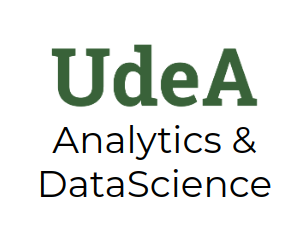

In [2]:
Image("local/imgs/udea-datascience.png")

In [3]:
import numpy as np # Matemetias y Matrices
import pandas as pd # para BD
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
from scipy.stats import shapiro # Pruebas Estadisticas
from scipy.stats import chi2_contingency # Pruebas de Independencia para Tablas de contingencia
from scipy import stats
### Modelación de Machine Learning
from sklearn.model_selection import train_test_split # Para dividir nuesntra BD en entrenamiento y Test
import statsmodels.api as sm
from scipy.stats import normaltest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
!pip install lifelines
from lifelines import KaplanMeierFitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.2 MB/s 
     |████████████████████████████████| 68 kB 4.0 MB/s 
     |████████████████████████████████| 38.1 MB 197 kB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=dc376ffc9049d04da0a516cd0b7659b224e6d2a280263a30a718a0cc42da6986
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.

In [5]:
url='https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/METABRIC_RNA_Mutation.csv'
df=pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
df=df.iloc[:,0:31]

In [8]:
df.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [9]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

**Analisis Tiempo Supervivencia**
* Vamos a analizar el efecto chemotherapy: Si la paciente recibió radioterapia como tratamiento (sí / no)
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte.
* overall_survival: Variable objetivo si el paciente está vivo o muerto.

In [10]:
df.radio_therapy.value_counts()

1    1137
0     767
Name: radio_therapy, dtype: int64

In [11]:
pd.crosstab(df.radio_therapy,df.overall_survival)

overall_survival,0,1
radio_therapy,,
0,496,271
1,607,530


In [12]:
df.death_from_cancer.value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

In [13]:
df.overall_survival.value_counts()

0    1103
1     801
Name: overall_survival, dtype: int64

In [17]:
radio_therapy=df[df.radio_therapy==1]
print(radio_therapy.shape)

(1137, 31)


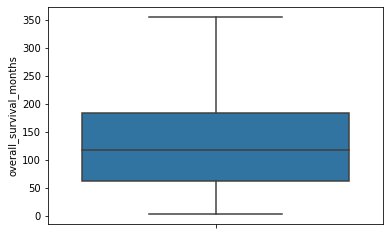

In [18]:
sns.boxplot(y="overall_survival_months", data=radio_therapy)
plt.show()

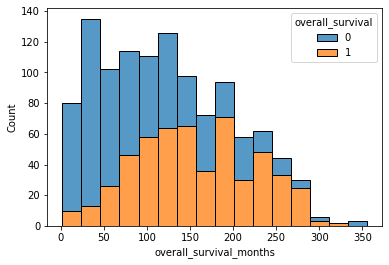

In [19]:
sns.histplot(data=radio_therapy, x="overall_survival_months", hue="overall_survival",multiple="stack")
plt.show()

In [20]:
radio_therapy.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,7,Left,0.0,4.0,4.062,IDC,7.800000,0,Positive,1,ER+/HER2- High Prolif,31.0,4.0,Died of Disease


Hallar el estimador de Kaplan-Meier para la función de supervivencia de todos los individuos juntos, sin importar el grupo. Representarlo en un gráfico. Representar con un símbolo sobre el gráfico anterior los eventos censurados.

In [21]:
radio_therapy["E"]=""
radio_therapy["E"][radio_therapy.overall_survival==1]=0
radio_therapy["E"][radio_therapy.overall_survival==0]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [22]:
radio_therapy.groupby("E").agg({"overall_survival_months":"mean"})

,overall_survival_months
E,
0,156.704969
1,96.860571


In [23]:
kmf=KaplanMeierFitter() # Vacio
kmf.fit(durations=radio_therapy.overall_survival_months,event_observed=radio_therapy.E)

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1137 total observations, 530 right-censored observations>

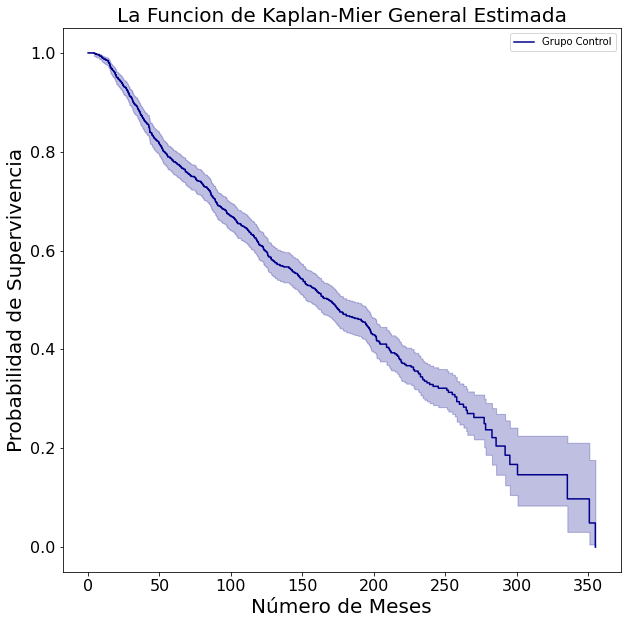

In [24]:
plt.figure(figsize=(10,10))
kmf.plot(color="darkblue")
plt.title("La Funcion de Kaplan-Mier General Estimada",fontsize=20)
plt.xlabel("Número de Meses",fontsize=20)
plt.ylabel("Probabilidad de Supervivencia",fontsize=20)
plt.legend(["Grupo Control"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**La función de supervivencia de todos los individuos juntos, radiotherapy**

In [25]:
radio_therapy.hormone_therapy.value_counts()

1    741
0    396
Name: hormone_therapy, dtype: int64

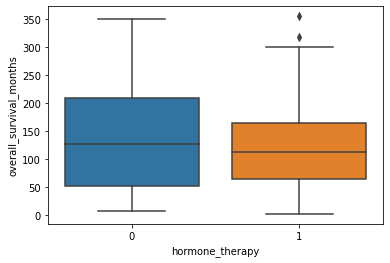

In [26]:
sns.boxplot(x="hormone_therapy",y="overall_survival_months", data=radio_therapy)
plt.show()

## Radioterapia vs Tratamiento Hormonal

In [27]:
control=radio_therapy[radio_therapy.hormone_therapy==0]
tratamiento=radio_therapy[radio_therapy.hormone_therapy==1]

In [28]:
# Modelos Instanciado, Pero Vacion sin ningun Ajuste de Datos
kmf_control=KaplanMeierFitter()
Kmf_tratamiento=KaplanMeierFitter()
# Ajustar Los datos a los Modelos
kmf_control.fit(durations=control.overall_survival_months,event_observed=control.E)
Kmf_tratamiento.fit(durations=tratamiento.overall_survival_months,event_observed=tratamiento.E)

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 741 total observations, 336 right-censored observations>

In [29]:
Mediana_Control=kmf_control.median_survival_time_
print(Mediana_Control)

204.2


In [30]:
Mediana_tratamiento=Kmf_tratamiento.median_survival_time_
print(Mediana_tratamiento)

156.33333330000002


In [31]:
Intervalos_Confianza_Funcion_Supervivencia_Control=kmf_control.confidence_interval_survival_function_
Intervalos_Confianza_Funcion_Supervivencia_Tratamiento=Kmf_tratamiento.confidence_interval_survival_function_

In [32]:
Intervalos_Confianza_Funcion_Supervivencia_Tratamiento.head(2)

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.0,1.0
2.0,1.0,1.0


In [33]:
Intervalos_Confianza_Funcion_Supervivencia_Control.head(3)

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.000000,1.000000,1.000000
7.866667,0.982211,0.999644
8.066667,0.979958,0.998734


In [34]:
#Grafica Control

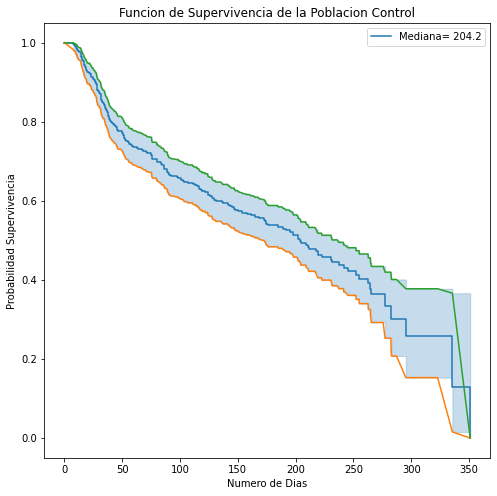

In [35]:
plt.figure(figsize=(8,8))
kmf_control.plot(label="Mediana= " + str(Mediana_Control))
plt.plot(Intervalos_Confianza_Funcion_Supervivencia_Control["KM_estimate_lower_0.95"],label="Inferior al 95%")
plt.plot(Intervalos_Confianza_Funcion_Supervivencia_Control["KM_estimate_upper_0.95"],label="Superior al 95%")
plt.title("Funcion de Supervivencia de la Poblacion Control")
plt.xlabel("Numero de Dias")
plt.ylabel("Probabilidad Supervivencia")
plt.show()

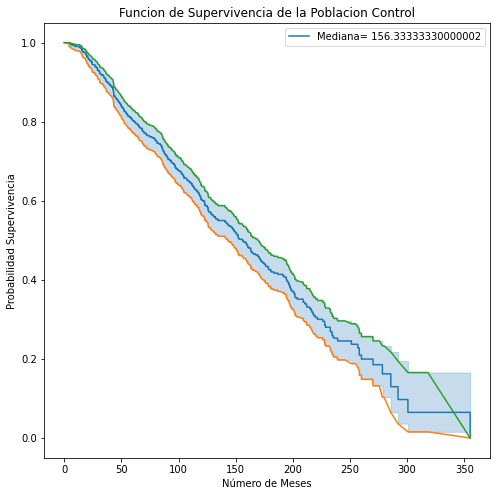

In [36]:
plt.figure(figsize=(8,8))
Kmf_tratamiento.plot(label="Mediana= " + str(Mediana_tratamiento))
plt.plot(Intervalos_Confianza_Funcion_Supervivencia_Tratamiento["KM_estimate_lower_0.95"],label="Inferior al 95%")
plt.plot(Intervalos_Confianza_Funcion_Supervivencia_Tratamiento["KM_estimate_upper_0.95"],label="Superior al 95%")
plt.title("Funcion de Supervivencia de la Poblacion Control")
plt.xlabel("Número de Meses")
plt.ylabel("Probabilidad Supervivencia")
plt.show()

In [37]:
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


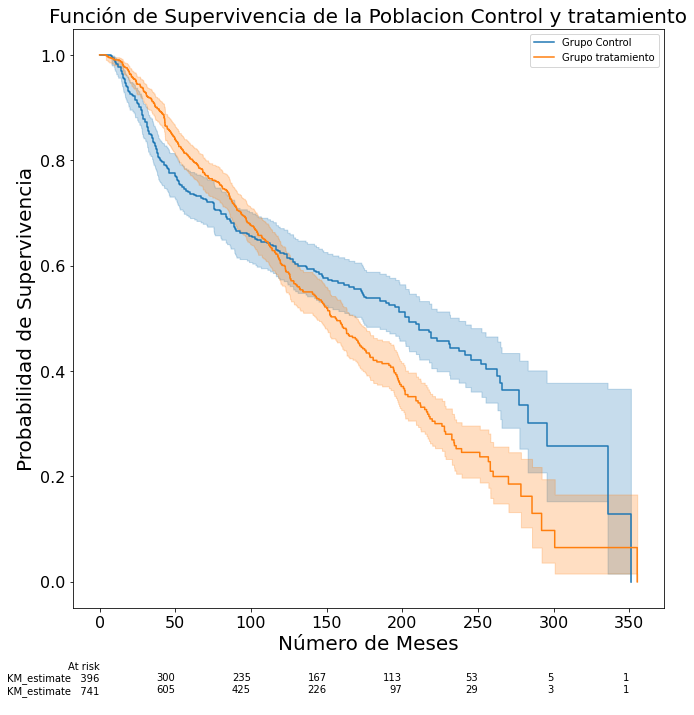

In [38]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
f1=kmf_control.fit(durations=control.overall_survival_months,event_observed=control["E"])
f1.plot(ax=ax)
f2=Kmf_tratamiento.fit(durations=tratamiento.overall_survival_months,event_observed=tratamiento["E"])
f2.plot(ax=ax)
plt.xlabel("Número de Meses",fontsize=20)
plt.ylabel("Probabilidad de Supervivencia",fontsize=20)
plt.legend(["Grupo Control","Grupo tratamiento"])
plt.title("Función de Supervivencia de la Poblacion Control y tratamiento",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
add_at_risk_counts(f1,f2,rows_to_show=['At risk'])
plt.tight_layout()

**Test Estadistico**

In [39]:
logrank_test(control.overall_survival_months,tratamiento.overall_survival_months,
             event_observed_A=control["E"],event_observed_B=tratamiento["E"])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.66 0.01      7.47

* H0: las probabilidades de supervivencia de los dos Grupos son Iguales
* Ha: las probabilidades de supervivencia de los dos Grupos son Diferentes

* Si el P valor < 0.05, Se rechaza H0

Conclusión las probailidades de supervivencia de los dos grupos de Muestras son iguales, el número de dias mediano de supervivencia del Grupo control es de 204 meses, mientras que el numero de dias mediano de supervivencia del Grupo con tratamiento hormonal es 156 meses. esto se demuestró estadisticamente
